# About Dataset
## Context

A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service
Content

AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise  
AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise  
AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise  
AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise  
AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise  
Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise  
Complain - 1 if customer complained in the last 2 years  
DtCustomer - date of customer’s enrolment with the company  
Education - customer’s level of education  
Marital - customer’s marital status  
Kidhome - number of small children in customer’s household  
Teenhome - number of teenagers in customer’s household  
Income - customer’s yearly household income  
MntFishProducts - amount spent on fish products in the last 2 years  
MntMeatProducts - amount spent on meat products in the last 2 years  
MntFruits - amount spent on fruits products in the last 2 years  
MntSweetProducts - amount spent on sweet products in the last 2 years  
MntWines - amount spent on wine products in the last 2 years  
MntGoldProds - amount spent on gold products in the last 2 years  
NumDealsPurchases - number of purchases made with discount  
NumCatalogPurchases - number of purchases made using catalogue  
NumStorePurchases - number of purchases made directly in stores  
NumWebPurchases - number of purchases made through company’s web site  
NumWebVisitsMonth - number of visits to company’s web site in the last month  
Recency - number of days since the last purchase

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# memanggil dataset 'marketing_campaign'

df=pd.read_csv("marketing_campaign.csv", sep=";")

## Descriptive Statistics

In [ ]:
# memanggil 5 data teratas dari dataset

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
num=['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
     'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
     'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
     'AcceptedCmp5', 'Complain','Z_CostContact', 'Z_Revenue', 'Response']
cat=['Education', 'Marital_Status']

In [ ]:
df[num].describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,5.316518,0.064286,0.013393,0.072768,0.074554,0.072768,0.009375,3.0,11.0,0.149107
std,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,2.426645,0.245316,0.114976,0.259813,0.262728,0.259813,0.096391,0.0,0.0,0.356274
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
#df[cat]=df[cat].astype('object')
#df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])
#df.info()

In [ ]:
df[cat].describe()

,Education,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


**A. Kesesuaian tipe data**  
> Kolom `Dt_Customer` berisi informasi tentang tanggal customer melakukan pendaftaran pada perusahaan tersebut. Namun pada dataset kolom tersebut memiliki tipe data *object*, seharusnya tipe data kolom tersebut ialah *date*.  

**B. Kolom yang memiliki nilai kosong**
>Ada atribut yang memiliki nilai kosong, yaitu income. Pada atribut lainnya tidak terdapat nilai kosong.

**C. Nilai summary yang agak aneh**
> * Kolom `Z_CostContact` memiliki nilai summary statistik yang sama baik nilai *min, mean, quartil, dan max* yaitu 3, sedangkan nilai std=0. Ini menunjukkan bahwa kolom tersebut memiliki nilai yang sama untuk setiap pengamatan.  
> * Kolom `Z_Revenue` memiliki nilai summary statistik yang sama baik nilai *min, mean, quartil, dan max* yaitu 11, sedangkan nilai std=0. Ini menunjukkan bahwa kolom tersebut memiliki nilai yang sama untuk setiap pengamatan.

## Univariate Analysis

C:\Users\Shania\AppData\Local\Temp\ipykernel_27108\3533815690.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=df[features[i]], color='blue')
C:\Users\Shania\AppData\Local\Temp\ipykernel_27108\3533815690.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=df[features[i]], color='blue')


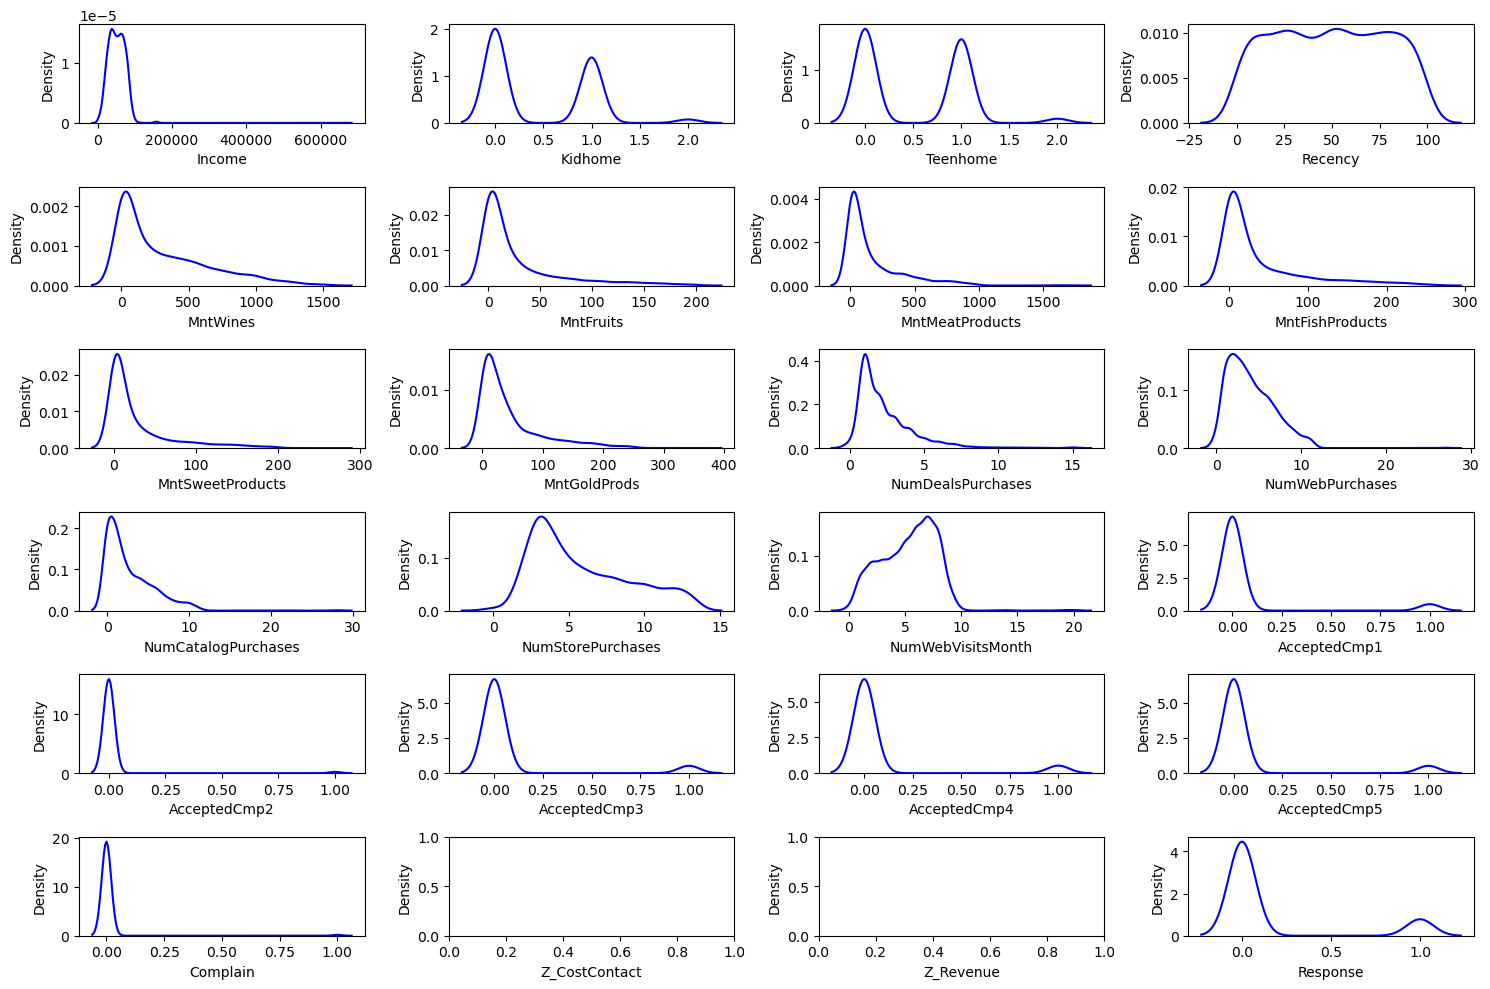

In [ ]:
plt.figure(figsize=(15,10))
features = num
for i in range (0, len(features)):
    plt.subplot(6, 4, i+1)
    sns.kdeplot(x=df[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

* Kolom `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`, `NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`, `NumWebVisitsMonth` berdistribusi *right-skewed*. Ini menunjukkan bahwa pada kolom-kolom tersebut nilai mean > median.  
* Kolom `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, `Complain`,`Z_Revenue`, `Response` membentuk distribusi bimodal dengan puncak pada nilai 0 dan 1.
* Kolom `Kidhome` dan `Teenhome` membentuk distribusi multimodal, membentuk puncak pada nilai 0, 1, dan 2.

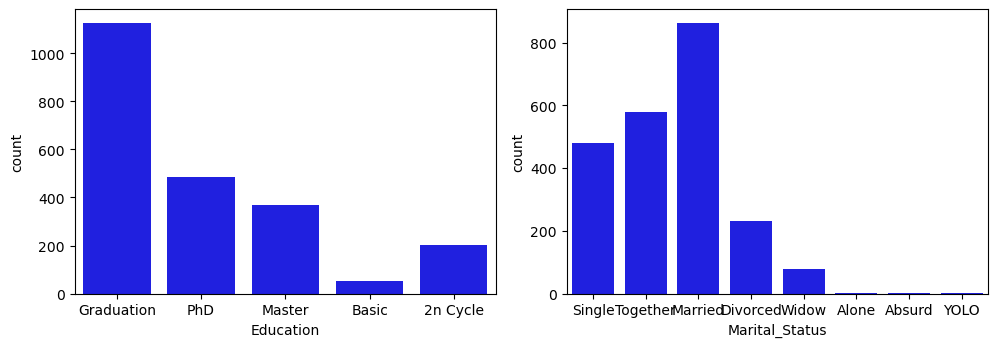

In [ ]:
plt.figure(figsize=(15,10))
features = cat
for i in range (0, len(features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

* Terdapat 5 kategori pada kolom `Education`, dengan kategori terbanyak 'Graduation' dan kategori paling sedikit 'Basic'.
* Terdapat 8 kategori pada kolom `Marital_Status`. Agar pemodelan lebih baik dapat dikategorikan ulang menjadi dua kategori menjadi 'Together' dan 'Alone'

In [ ]:
def kel(df, attribute):
    result = df.groupby(attribute).agg({'ID':'nunique'})
    return result

# Example usage for each attribute in 'cat'
for attribute in cat:
    result = kel(df, attribute)
    print(f"Grouped by {attribute}:\n{result}\n")

Grouped by Education:
              ID
Education       
2n Cycle     203
Basic         54
Graduation  1127
Master       370
PhD          486

Grouped by Marital_Status:
                 ID
Marital_Status     
Absurd            2
Alone             3
Divorced        232
Married         864
Single          480
Together        580
Widow            77
YOLO              2



## Multivariate Analysis

C:\Users\Shania\AppData\Local\Temp\ipykernel_27108\230821267.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')


<Axes: >

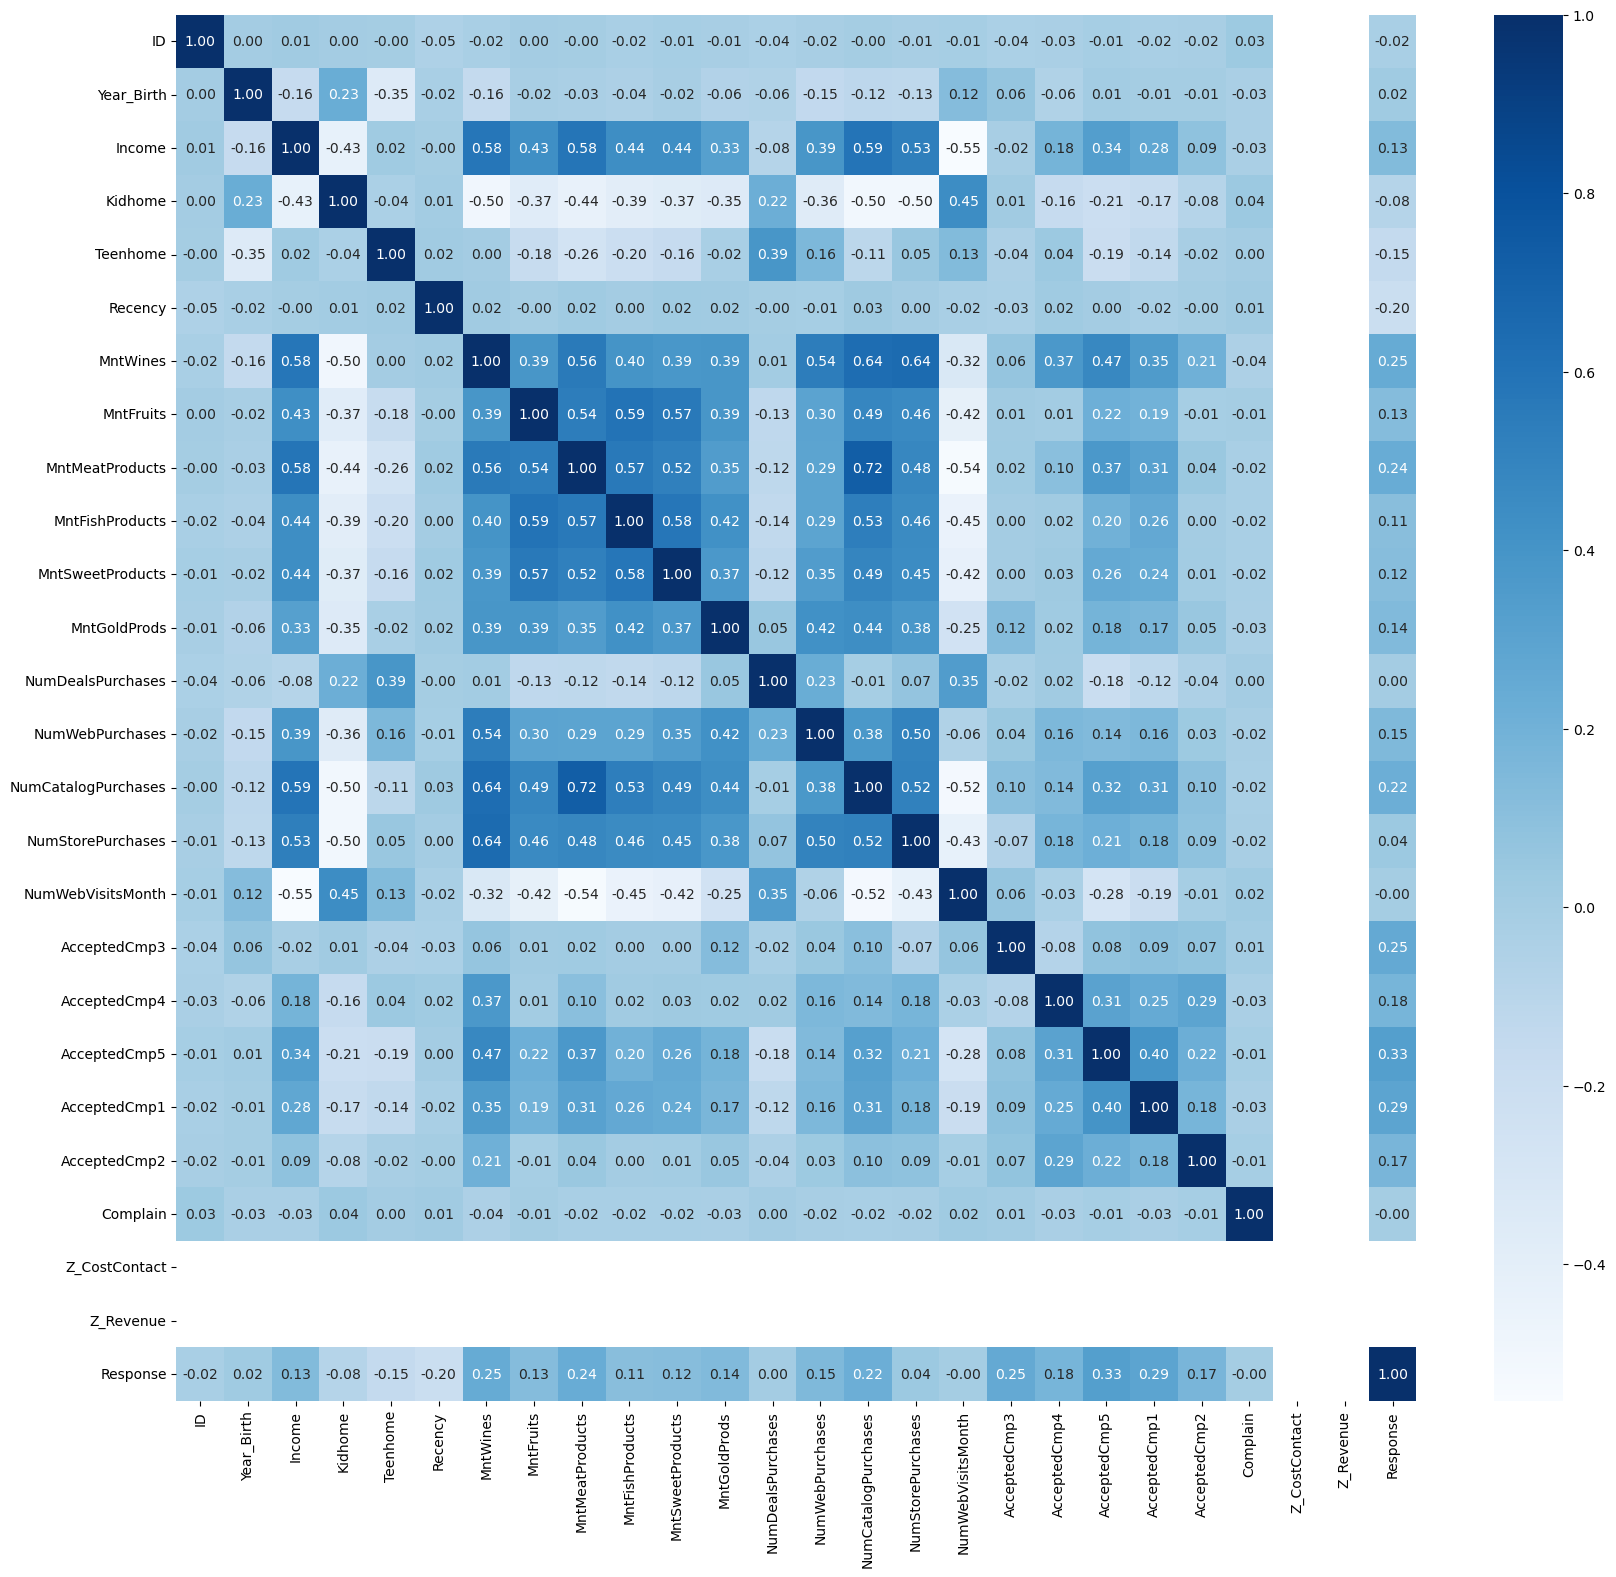

In [ ]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

**Korelasi antara feature dengan label**
> * Terdapat korelasi yang lemah dan arahnya positif antara `Response` dengan `MntWines`, `MntFruits`,  `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`. Ini menunjukkan bahwa customer yang menerima penawaran pada campaign terakhir, membeli produk-produk tersebut.
> * Terdapat korelasi yang lemah dan arahnya positif antara `Response` dengan `NumWebPurchases`, `NumCatalogPurchases`.
> * Terdapat korelasi lemah dan positif antara `Response` dengan `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`,`AcceptedCmp4`, `AcceptedCmp5`. Customer yang menerima penawaran pada campaign terakhir juga menerima penawaran pada campaign-campaign sebelumnya.
> * Terdapat korelasi lemah dan negatif antara `Response` dengan `Teenhome`, semakin banyak jumlah anak yang dimiliki customer maka customer cenderung tidak nemerima penawaran pada campaign terakhir. Begitu pula hubungan antara `Response` dengan `Recency`. Semakin lama jarak pembelian terakhir customer maka customer cenderung tidak menerima penawaran pada campaign terakhir.

**Korelasi antar feature**
> * Terdapat korelasi yang cukup kuat dan arahnya positif antara `Income` dan `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`. Korelasi ini menunjukkan bahwa semakin tinggi pendapatan customer maka semakin banyak jumlah uang yang ia keluarkan untuk membeli produk-produk tersebut.
> * Terdapat korelasi yang cukup kuat dan arahnya positif antara `Income` dan `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`. Korelasi ini menunjukkan semakin tinggi pendapatan customer maka semakin sering customer berbelanja dengan metode-metode tersebut. Namun, korelasi  antara `Income` dan `NumWebVisitsMonth` bernilai negatif, yang berarti semakin tinggi pendapatan customer maka semakin jarang customer tersebut mengunjungi website perusahaan.
> * Terdapat korelasi yang cukup dan arahnya negatif antara `Kidhome` dan `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`. Ini menunjukkan bahwa semakin banyak jumlah anak yang dimiliki oleh customer maka jumlah uang yang dikeluarkan oleh customer untuk membeli barang-barang tersebut semakin sedikit.
> * Terdapat korelasi dan arahnya negatif antara `Kidhome` dengan `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`. Korelasi ini menunjukkan semakin banyak jumlah anak yang dimiliki oleh customer maka semakin jarang customer berbelanja dengan metode-metode tersebut. Namun, korelasi  antara `Kidhome` dan `NumWebVisitsMonth` bernilai positif, yang berarti semakin banyak jumlah anak customer maka semakin sering customer tersebut mengunjungi website perusahaan.
> * Terdapat korelasi yang cukup kuat dan positif antara `MntWines`, dengan `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`. Ini menunjukkan semakin banyak uang yg dikeluarkan customer untuk membeli wine maka semakin banyak pula uang yang dikeluarkan customer untuk membeli barang-barang lainnya. Pelanggan yang mengeluarkan uang untuk membeli wine juga cenderung akan menerima penawaran campaign `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp4`, `AcceptedCmp5`.
>* Terdapat korelasi yang  positif antara produk-produk yang dijual (`MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`) dengan `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`. Ini menunjukkan bahwa semakin banyak uang yang dikeluarkan customer untuk membeli produk-produk tersebut, semakin sering juga customer membeli melalui metode pembelian tersebut. Antara `MntMeatProducts` dengan `NumCatalogPurchases` terdapat korelasi yang kuat, yang berarti semakin sering melakukan pembelian menggunakan catalog maka semakin banyak customer membeli daging.
> * Pembelian dengan diskon dilakukan melalui website. Ini ditunjukkan adanya korelasi antara `NumDealsPurchase` dengan `NumWebPurchases` dan `NumWebVisitsMonth`, namun korelasi antar keduanya lemah.

## Business Insight

<Axes: >

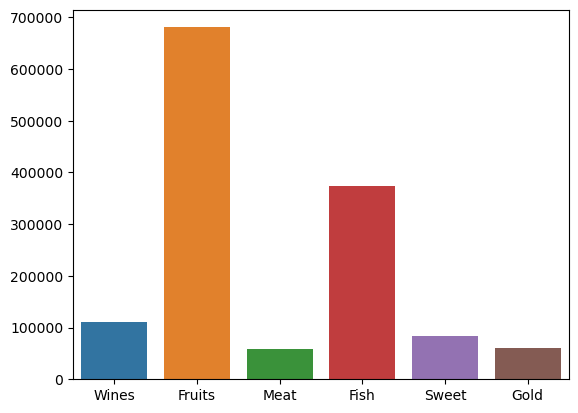

In [ ]:
products = ['Wines','Fruits','Meat','Fish','Sweet','Gold']
values = [df[col].sum() for col in df.columns[8:14]]
sns.barplot(x=products,y=values)

**Jumlah Penjualan**

> * Dari sini, dapat dilihat pernjualan terbanyak berada pada `Fruits` sedangkang penjualan paling sedikit berada di `Meat`.


In [ ]:
df['Age']=2023-df['Year_Birth']
df.drop(columns = 'Year_Birth',inplace= True)
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
meann = df['Age'].quantile(0.5)
maxx= df['Age'].max()
minn=df['Age'].min()
print(q1)
print(q3)
print(meann)
print(minn)
print(maxx)

46.0
64.0
53.0
27
130


**Umur Pembeli**
> * Dari sini, dapat dilihat rata-rata konsumen berumur 53 tahun.
> * Usia pembeli di market dari yang termuda berumur 27 tahun dan yang paling tua berumur 130 tahun
> * Simpangan umur yang pertama dengan simpangan umur yang ketiga tidak terlalu jauh dengan rata rata sehingga data disini memiliki umur yang tidak terlalu menyimpang

<Axes: xlabel='Age_Category', ylabel='count'>

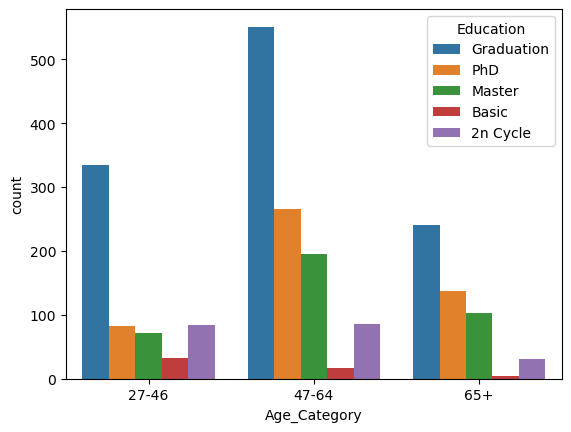

In [ ]:
labels = ['27-46','47-64','65+']
ranges=[0,46,64,83]
df['Age_Category']=pd.cut(df['Age'],bins=ranges,labels=labels)
sns.countplot(data=df,x=df['Age_Category'],hue=df['Education'])

**Kategori Umur Berdasarkan Pendidikan**
> Lebih banyak orang yang rentangnya berada di umur 47 hingga 64 tahun terutama yang lulus sekolah wajib (graduation) sehingga ada baiknya jika target usia serta jenis pelanggan dari toko disesuaikan dengan data tersebut.

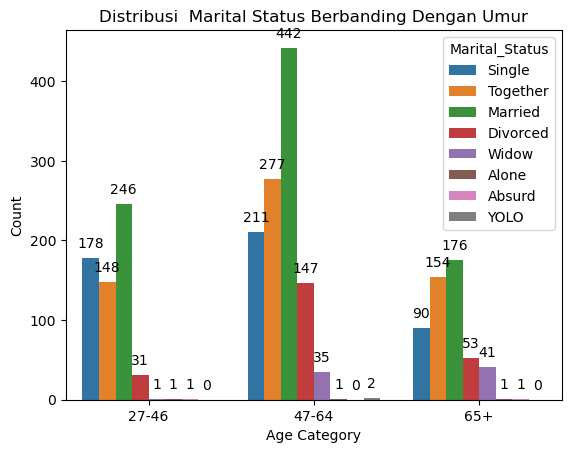

In [ ]:
ax = sns.countplot(data= df,x=df['Age_Category'],hue =df['Marital_Status'])
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Distribusi  Marital Status Berbanding Dengan Umur')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()


**Kategori Umur berdasarkan Status Pernikahan**

> Berdasarkan tabel tersebut, terlihat bahwa kebanyakan pelanggan merupakan pasangan yang sedang menikah di umur 27 hingga lebih dari 65 tahun. Ada baiknya jika toko melakukan acara, bisa ditujukan untuk pasangan suami-istri.

Text(0.5, 1.0, 'Jumlah Transaksi Berdasarkan Platform ')

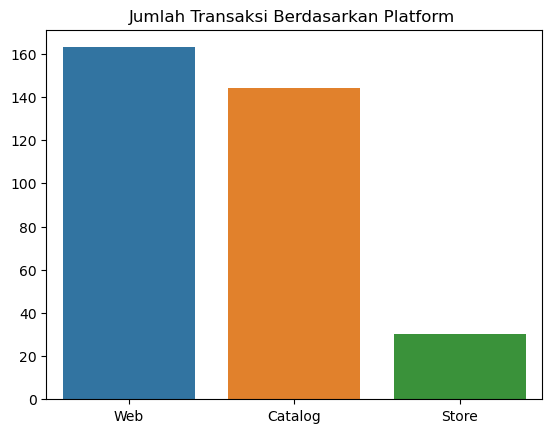

In [ ]:
places =['Web','Catalog','Store']
values =[df[col].sum() for col in df.columns[-9:-6]]
sns.barplot(x=places,y=values)
plt.title('Jumlah Transaksi Berdasarkan Platform ')


**Platform**
> Platform yang banyak digunakan adalah Web, sehingga ada baiknya untuk lebih menggencarkan promosi dalam Web

In [4]:
df.groupby('Response').agg({'ID':'count'})

,ID
Response,
0,1906
1,334


In [8]:
df.groupby(['Response','Kidhome']).agg({'ID':'nunique'})

ID
Response Kidhome      
0        0        1071
         1         789
         2          46
1        0         222
         1         110
         2           2